![](markdown/complexFlowchart.jpg)

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [166]:
location = [k+v for k,v in enumerate(np.random.rand(50))]
velocity = [0.5+n for n in np.random.rand(50)]

In [119]:
location = [4000, 4260, 4550, 4860, 5110]
velocity = [280, 282, 285, 286, 290 ]

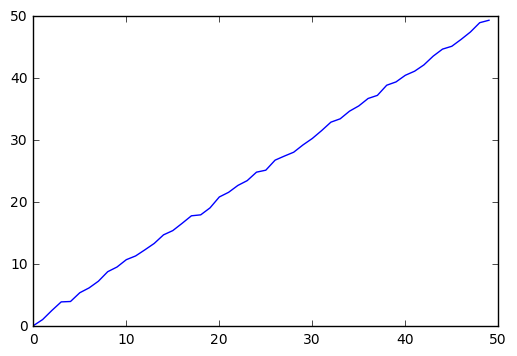

In [167]:
plt.plot(location)

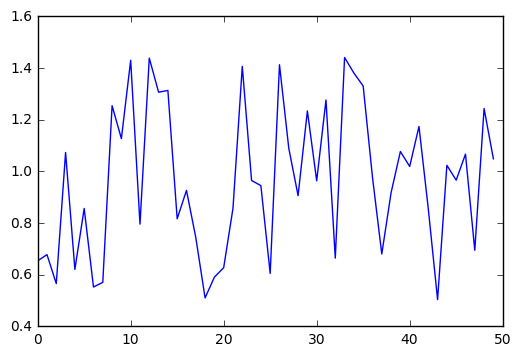

In [168]:
plt.plot(velocity)

In [169]:
data = [np.array([[l],[v]]) for l,v in zip(location, velocity)]

In [200]:
dt = 1

estimate = data[0] # x
stateCovariance = np.array( [[0.5, 1e-9], [1e-9, 0.5]] ) # p

stateCovarianceNoise = np.array( [[0.1, 0], [0, 0.1]] ) # q
estimatePredictNoise = np.array( [[0], [0]] ) # w
dataNoise = np.array( [[0], [0]] ) # z

dataError = np.array( [[0.5, 1e-9], [ 1e-9, 1]] ) # r

# If dt is varying this needs to move the the beginning of the for loop
convertA = np.array( [[1, dt],[0, 1]] ) # A
convertB = np.array( [[dt**2/2],[dt]] ) # B
convertC = np.array( [[1, 0], [0, 1]] ) # C
convertH = np.array( [[1, 0], [0,1]] ) # H
acceleration = np.array( [[0]] )

pastEstimate = []
pastEstimate.append( estimate )
for d in data[1:]:
    estimatePredict = np.dot( convertA, estimate ) + np.dot( convertB, acceleration ) + estimatePredictNoise
   
    stateConvariancePredict = np.dot( convertA, np.dot( stateCovariance, convertA.T )) + stateCovarianceNoise
    stateConvariancePredict[0][1] = 0
    stateConvariancePredict[1][0] = 0
   
    d = np.dot( convertC, d ) + dataNoise
   
    temp = np.dot(stateConvariancePredict, convertH.T)
    gain = temp/( np.dot( convertH, temp) + dataError )
   
    estimate = estimatePredict + np.dot( gain, d - np.dot( convertH, estimatePredict ) )
    pastEstimate.append( estimate )
    
    stateCovariance = np.dot(( 1 - np.dot( gain, convertH)), stateConvariancePredict )

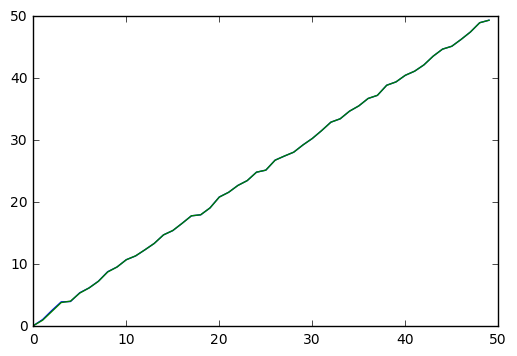

In [201]:
plt.plot( location )
plt.plot([x[0][0] for x in pastEstimate])

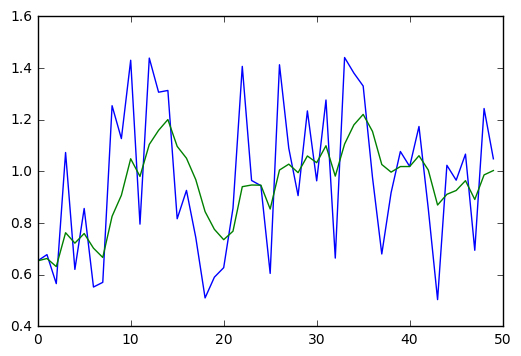

In [202]:
plt.plot(velocity)
plt.plot([x[1][0] for x in pastEstimate])